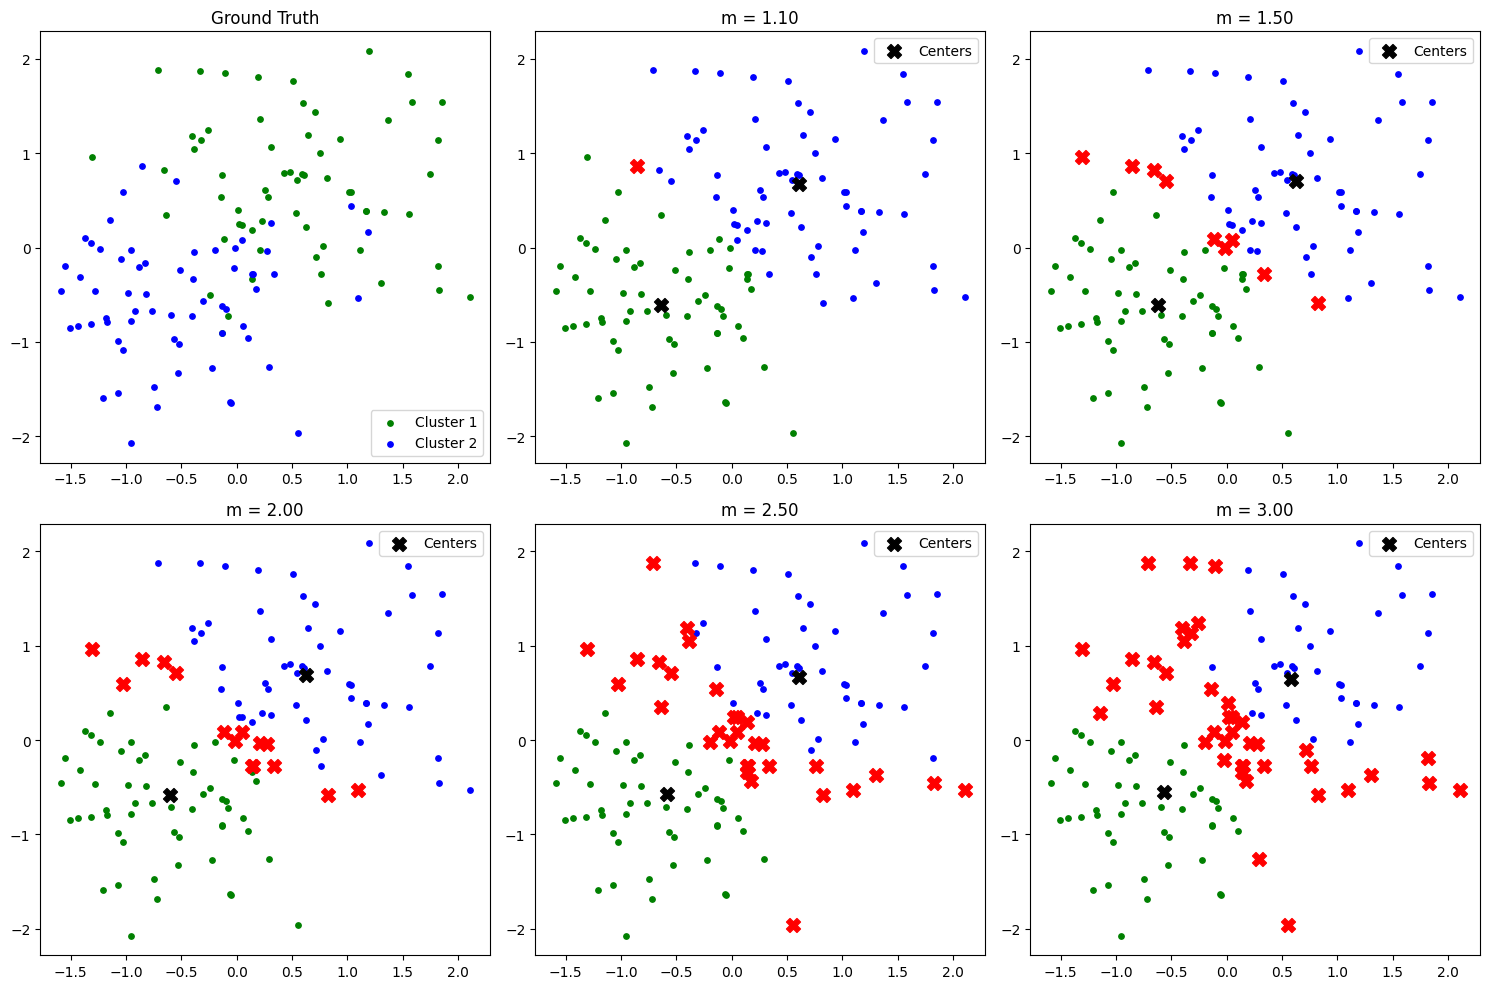

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# 生成数据集
np.random.seed(0)
n = 128
# 前一半点集, 均值 [0.5, 0.5], 协方差 0.5I
data1 = np.random.multivariate_normal([0.5, 0.5], 0.5 * np.eye(2), n // 2)
# 后一半点集, 均值 [-0.5, -0.5], 协方差 0.5I
data2 = np.random.multivariate_normal([-0.5, -0.5], 0.5 * np.eye(2), n // 2)
# 合并数据
data = np.vstack((data1, data2)).T

# 定义模糊度参数 m 的不同取值
m_values = [1.1, 1.5, 2, 2.5, 3]
# 初始化绘图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
# 绘制 Ground Truth
axes[0].scatter(data[0, :n//2], data[1, :n//2], color='green', s=15, label="Cluster 1")
axes[0].scatter(data[0, n//2:], data[1, n//2:], color='blue', s=15, label="Cluster 2")
axes[0].set_title("Ground Truth")
axes[0].legend()

# 设置隶属度阈值
epsilon = 0.65

# 进行模糊 c 均值聚类并绘制结果
for i, m in enumerate(m_values, 1):
    # 执行模糊c均值聚类
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data, 2, m, error=0.005, maxiter=25)
    
    # 获取每个点的所属类别
    cluster_membership = np.argmax(u, axis=0)
    colors = ['green', 'blue']
    for j in range(2):
        cluster_data = data[:, cluster_membership == j]
        axes[i].scatter(cluster_data[0, :], cluster_data[1, :], color=colors[j], s=15)
    
    # 绘制模糊度较高的点（隶属度低于阈值）
    for j in range(data.shape[1]):
        if np.max(u[:, j]) < epsilon:
            axes[i].scatter(data[0, j], data[1, j], marker='X', color='red', s=100)
    
    # 标注聚类中心
    axes[i].scatter(cntr[:, 0], cntr[:, 1], marker='X', color='black', s=100, label='Centers')
    axes[i].set_title(f"m = {m:.2f}")
    axes[i].legend()

# 显示结果
plt.tight_layout()
plt.show()
